In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [15]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

c:\Users\Akash.Kushwaha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

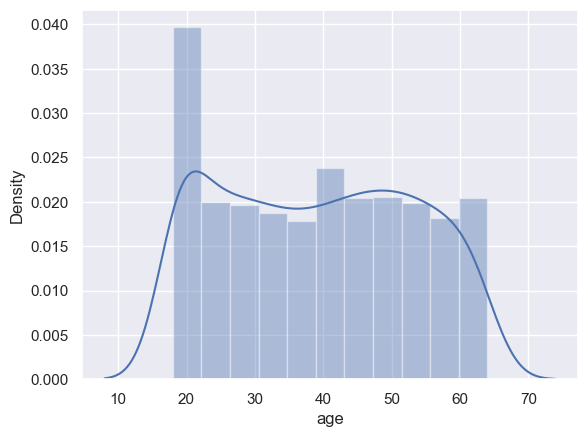

In [22]:
sns.set()

sns.distplot(df['age'])

<AxesSubplot:xlabel='sex', ylabel='count'>

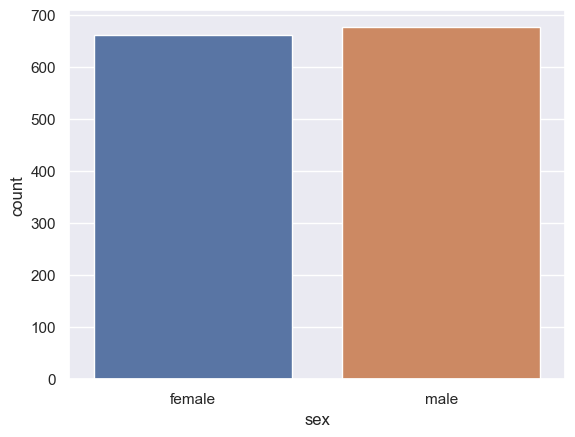

In [24]:
sns.countplot(x = df['sex'])

c:\Users\Akash.Kushwaha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

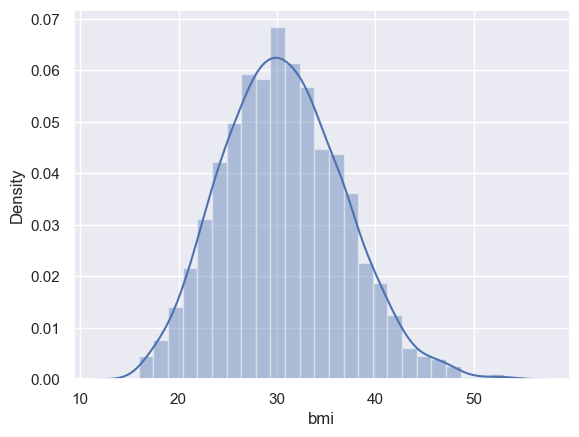

In [25]:
sns.distplot(df['bmi'])

c:\Users\Akash.Kushwaha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

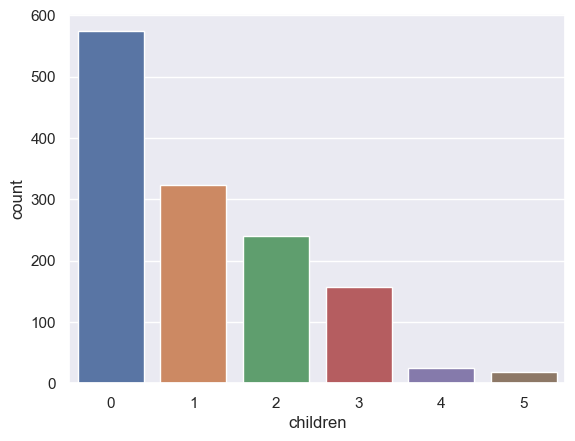

In [28]:
sns.countplot(df['children'])

c:\Users\Akash.Kushwaha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

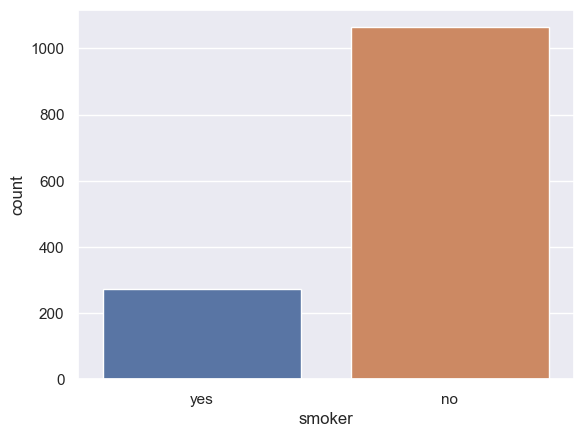

In [29]:
sns.countplot(df['smoker'])

c:\Users\Akash.Kushwaha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

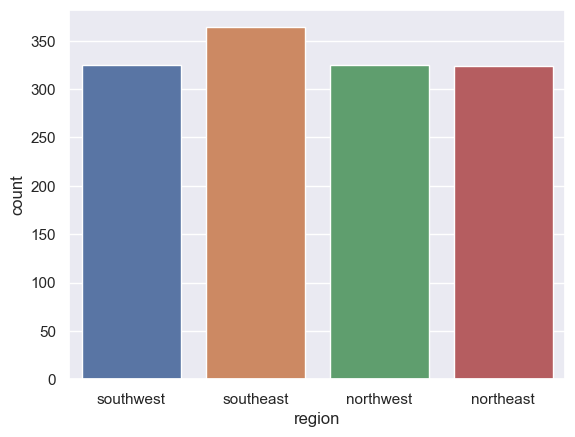

In [30]:
sns.countplot(df['region'])

c:\Users\Akash.Kushwaha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

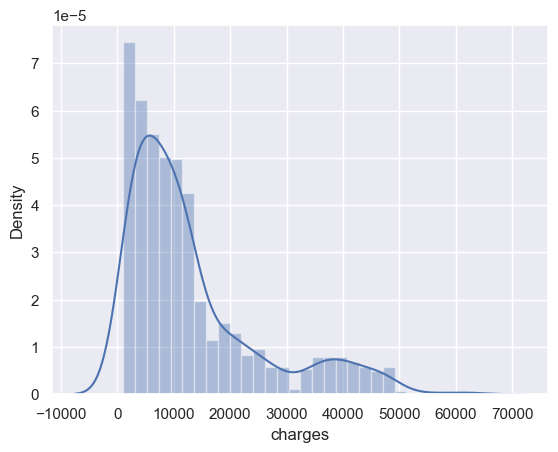

In [31]:
sns.distplot(df['charges'])

In [33]:
df.replace({'sex':{'male':0,"female":1},'smoker':{'yes':0,'no':1}},inplace = True)

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


In [35]:
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace = True)

In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [37]:
X = df.drop(['charges'],1)
Y = df['charges']

C:\Users\Akash.Kushwaha\AppData\Local\Temp\ipykernel_15968\4104774616.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(['charges'],1)


In [38]:
x_train,x_test,y_train,y_test  = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [39]:
model = LinearRegression()

In [40]:
model.fit(x_train,y_train)

LinearRegression()

In [41]:
y_train_pred = model.predict(x_train)

In [42]:
r2_score(y_train,y_train_pred)

0.751505643411174

In [43]:
y_test_pred = model.predict(x_test)
r2_score(y_test,y_test_pred)

0.7447273869684077

In [44]:
#Predictive System

In [47]:
input = (34,1,31.92,1,0,2)

input_arr = np.asarray(input)
input_arr = input_arr.reshape(1,-1)

prediction = model.predict(input_arr)

prediction

c:\Users\Akash.Kushwaha\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31490.51146681])